In [2]:
from qiskit import IBMQ, Aer, assemble, transpile, QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.visualization import array_to_latex
from qiskit.tools.monitor import job_monitor 
from qiskit.providers.ibmq import least_busy

import datetime
from datetime import time
from datetime import datetime
import pytz
from pytz import timezone

import numpy as np
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [3]:
matrixdata = {}

#time loop 
def collectdata(matrixdata, startinghour, listofminutes):
    t = datetime.now(pytz.timezone('US/Central'))
    print(t)
    for val in listofminutes:
        while True:
            if t.hour== startinghour and t.minute == val: 
                bigmatrix= []
                #copied from the qiskit document in slack 
                for state in ['000','001','010','011','100','101','110','111']:
                    qc = QuantumCircuit(3,3)
                    if state[0]=='1':
                        qc.x(2)
                    if state[1]=='1':
                        qc.x(1)
                    if state[2]=='1':
                        qc.x(0)
                    qc.measure([0, 1, 2],[0,1,2])

                    #copied from summer school code
                    IBMQ.load_account()
                    provider = IBMQ.get_provider(hub='ibm-q-education', group='fermilab-1', project='qjs-for-hep')
                    backend = provider.get_backend('ibmq_casablanca')
                    print("backend: ", backend)

                    shots = 5000
                    transpiled_qc = transpile(qc, backend=backend)
                    job = backend.run(transpiled_qc, shots=shots)
                    job_monitor(job, interval=2)
                    results = job.result().get_counts()
                    print ("results:", results)

                    # in this next part I'm just trying to say that if there's less than 4 items (implying that one of the states showed up zero times), add a zero at the corresponding spot in the list
                    # i'm sure there's a more efficient way to do this 
                    keys= results.keys()
                    values = results.values()
                    numoftimes= []
                    state= []
                    for value in values:
                        numoftimes.append(value/5000)
                    for key in keys:
                        state.append(key)

                    while len(state) < 8:
                        state.append(0)

                    if state != ['000','001','010','011','100','101','110','111']:
                        if state[0] != '000':
                            state.insert(0,'000')
                            numoftimes.insert(0,0)
                        if state[1] != '001':
                            state.insert(1,'001')
                            numoftimes.insert(1,0)
                        if state[2] != '010':
                            state.insert(2,'010')
                            numoftimes.insert(2,0)
                        if state[3] != '011':
                            state.insert(3,'011')
                            numoftimes.insert(3,0)
                        if state[4] != '100':
                            state.insert(4,'100')
                            numoftimes.insert(4,0)
                        if state[5] != '101':
                            state.insert(5,'101')
                            numoftimes.insert(5,0)
                        if state[6] != '110':
                            state.insert(6,'110')
                            numoftimes.insert(6,0)
                        if state[7] != '111':
                            state.insert(7,'111')
                            numoftimes.insert(7,0)

                    print(numoftimes)
                    bigmatrix.append(numoftimes)

                print("big matrix:", bigmatrix)
                matrixdata[str(datetime.now(pytz.timezone('US/Central')))]= bigmatrix
                break
            else:
                t = datetime.now(pytz.timezone('US/Central'))
    return matrixdata


In [4]:
print(matrixdata)

{}


In [5]:
matrixdata = {'2021-11-13 17:09:10.667507-06:00': [[0.9786, 0.0056, 0.012, 0.0004, 0.0034, 0, 0, 0], [0.0638, 0.9176, 0.0014, 0.0132, 0.0002, 0.0036, 0, 0.0002], [0.0378, 0.0012, 0.9476, 0.0084, 0.0002, 0, 0.0048, 0], [0.0038, 0.0384, 0.077, 0.8742, 0, 0, 0.0008, 0.0058], [0.014, 0, 0, 0, 0.9754, 0.0064, 0.0038, 0.0004], [0.0012, 0.0144, 0, 0, 0.0498, 0.9266, 0.0006, 0.0074], [0.0012, 0, 0.014, 0, 0.0486, 0.0006, 0.9282, 0.0074], [0, 0.0002, 0.0006, 0.0092, 0.003, 0.0498, 0.0576, 0.8796]], '2021-11-13 17:29:26.314269-06:00': [[0.9678, 0.0188, 0.0074, 0.0018, 0.0042, 0, 0, 0], [0.0654, 0.8658, 0.0098, 0.0552, 0.0002, 0.0034, 0, 0.0002], [0.0484, 0.0008, 0.939, 0.008, 0.0004, 0, 0.0034, 0], [0.0044, 0.0452, 0.0682, 0.8804, 0.0002, 0.0002, 0, 0.0014], [0.0128, 0, 0.0006, 0, 0.9448, 0.0156, 0.0258, 0.0004], [0.001, 0.0132, 0, 0, 0.0706, 0.9022, 0.0016, 0.0114], [0.0006, 0.0002, 0.0136, 0.0004, 0.0436, 0.0006, 0.932, 0.009], [0, 0.0002, 0.0006, 0.0112, 0.0034, 0.0416, 0.0674, 0.8756]], '2021-11-13 17:50:55.626124-06:00': [[0.9814, 0.0064, 0.006, 0.0002, 0.0058, 0.0002, 0, 0], [0.0612, 0.9264, 0.0002, 0.0062, 0.0002, 0.0058, 0, 0], [0.0556, 0.0004, 0.9302, 0.0088, 0.0004, 0, 0.0044, 0.0002], [0.0036, 0.0474, 0.0566, 0.8882, 0, 0, 0.0004, 0.0038], [0.014, 0.0002, 0, 0, 0.969, 0.0116, 0.0052, 0], [0.0008, 0.0112, 0, 0, 0.0536, 0.9266, 0.0008, 0.007], [0.0008, 0, 0.0128, 0, 0.0486, 0.0002, 0.9272, 0.0104], [0, 0.0008, 0.0006, 0.0116, 0.0034, 0.0366, 0.0558, 0.8912]]}
for key, value in matrixdata.items():
    print(key, value)

2021-11-13 17:09:10.667507-06:00 [[0.9786, 0.0056, 0.012, 0.0004, 0.0034, 0, 0, 0], [0.0638, 0.9176, 0.0014, 0.0132, 0.0002, 0.0036, 0, 0.0002], [0.0378, 0.0012, 0.9476, 0.0084, 0.0002, 0, 0.0048, 0], [0.0038, 0.0384, 0.077, 0.8742, 0, 0, 0.0008, 0.0058], [0.014, 0, 0, 0, 0.9754, 0.0064, 0.0038, 0.0004], [0.0012, 0.0144, 0, 0, 0.0498, 0.9266, 0.0006, 0.0074], [0.0012, 0, 0.014, 0, 0.0486, 0.0006, 0.9282, 0.0074], [0, 0.0002, 0.0006, 0.0092, 0.003, 0.0498, 0.0576, 0.8796]]
2021-11-13 17:29:26.314269-06:00 [[0.9678, 0.0188, 0.0074, 0.0018, 0.0042, 0, 0, 0], [0.0654, 0.8658, 0.0098, 0.0552, 0.0002, 0.0034, 0, 0.0002], [0.0484, 0.0008, 0.939, 0.008, 0.0004, 0, 0.0034, 0], [0.0044, 0.0452, 0.0682, 0.8804, 0.0002, 0.0002, 0, 0.0014], [0.0128, 0, 0.0006, 0, 0.9448, 0.0156, 0.0258, 0.0004], [0.001, 0.0132, 0, 0, 0.0706, 0.9022, 0.0016, 0.0114], [0.0006, 0.0002, 0.0136, 0.0004, 0.0436, 0.0006, 0.932, 0.009], [0, 0.0002, 0.0006, 0.0112, 0.0034, 0.0416, 0.0674, 0.8756]]
2021-11-13 17:50:55.626124

In [6]:
listofmatrixes= []
for key, value in matrixdata.items():
    value= np.array(value)
    value= value.transpose()
    listofmatrixes.append(value)
print(listofmatrixes)

[array([[9.786e-01, 6.380e-02, 3.780e-02, 3.800e-03, 1.400e-02, 1.200e-03,
        1.200e-03, 0.000e+00],
       [5.600e-03, 9.176e-01, 1.200e-03, 3.840e-02, 0.000e+00, 1.440e-02,
        0.000e+00, 2.000e-04],
       [1.200e-02, 1.400e-03, 9.476e-01, 7.700e-02, 0.000e+00, 0.000e+00,
        1.400e-02, 6.000e-04],
       [4.000e-04, 1.320e-02, 8.400e-03, 8.742e-01, 0.000e+00, 0.000e+00,
        0.000e+00, 9.200e-03],
       [3.400e-03, 2.000e-04, 2.000e-04, 0.000e+00, 9.754e-01, 4.980e-02,
        4.860e-02, 3.000e-03],
       [0.000e+00, 3.600e-03, 0.000e+00, 0.000e+00, 6.400e-03, 9.266e-01,
        6.000e-04, 4.980e-02],
       [0.000e+00, 0.000e+00, 4.800e-03, 8.000e-04, 3.800e-03, 6.000e-04,
        9.282e-01, 5.760e-02],
       [0.000e+00, 2.000e-04, 0.000e+00, 5.800e-03, 4.000e-04, 7.400e-03,
        7.400e-03, 8.796e-01]]), array([[9.678e-01, 6.540e-02, 4.840e-02, 4.400e-03, 1.280e-02, 1.000e-03,
        6.000e-04, 0.000e+00],
       [1.880e-02, 8.658e-01, 8.000e-04, 4.520e-02, 

In [7]:
array_to_latex(listofmatrixes[0])

<IPython.core.display.Latex object>

In [8]:
array_to_latex(listofmatrixes[1])

<IPython.core.display.Latex object>

In [9]:
array_to_latex(listofmatrixes[2])

<IPython.core.display.Latex object>

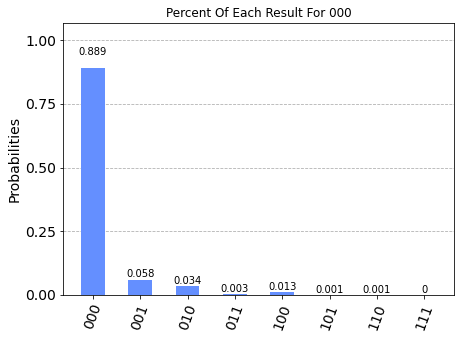

In [10]:
examplematrix=listofmatrixes[0]

statelist = ['000','001','010','011','100','101','110','111']

zerozerozero = examplematrix[0]
zerozeroone = examplematrix[1]
zeroonezero = examplematrix[2]
zerooneone = examplematrix[3]
onezerozero = examplematrix[4]
onezeroone = examplematrix[5]
oneonezero = examplematrix[6]
oneoneone = examplematrix[7]

zerozerozerodic = dict(zip(statelist,zerozerozero))
zerozeroonedic = dict(zip(statelist, zerozeroone))
zeroonezerodic = dict(zip(statelist,zeroonezero))
zerooneonedic = dict(zip(statelist,zerooneone))
onezerozerodic = dict(zip(statelist,onezerozero))
onezeroonedic = dict(zip(statelist,onezeroone))
oneonezerodic = dict(zip(statelist,oneonezero))
oneoneonedic = dict(zip(statelist,oneoneone))


plot_histogram([zerozerozerodic], title="Percent Of Each Result For 000")

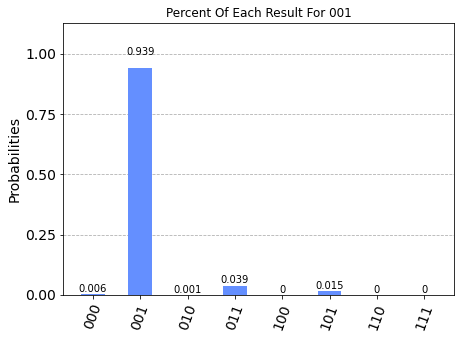

In [11]:
plot_histogram([zerozeroonedic], title="Percent Of Each Result For 001")

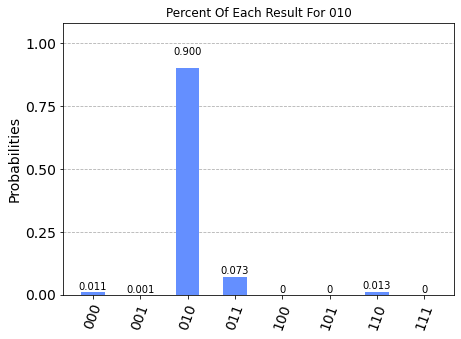

In [12]:
plot_histogram([zeroonezerodic], title="Percent Of Each Result For 010")

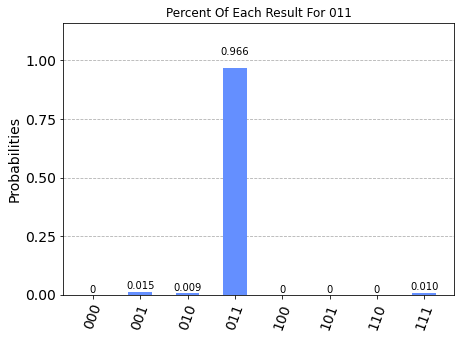

In [13]:
plot_histogram([zerooneonedic], title="Percent Of Each Result For 011")

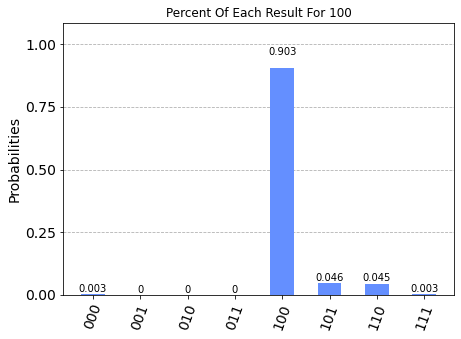

In [14]:
plot_histogram([onezerozerodic], title="Percent Of Each Result For 100")

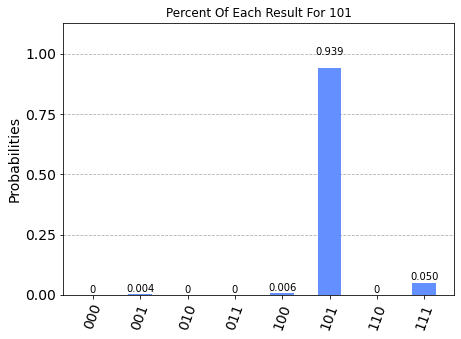

In [15]:
plot_histogram([onezeroonedic], title="Percent Of Each Result For 101")

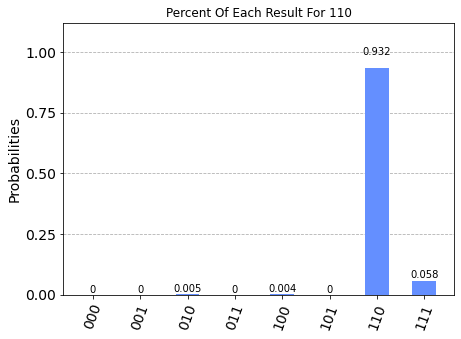

In [16]:
plot_histogram([oneonezerodic], title="Percent Of Each Result For 110")

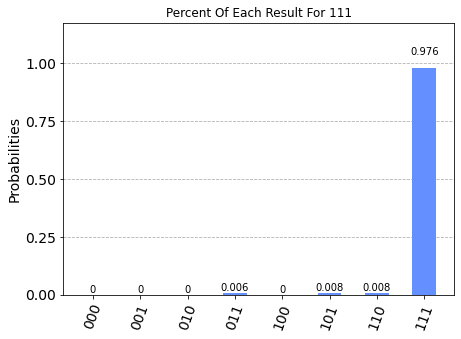

In [17]:
plot_histogram([oneoneonedic], title="Percent Of Each Result For 111")

In [18]:
detlist = []
for array in listofmatrixes: 
    detlist.append(np.linalg.det(array))
print (detlist)

[0.5466659214883641, 0.4771069688942735, 0.5550709064478989]


In [19]:
timelist = []
for key, value in matrixdata.items():
    timeofday= key.split(' ')[1]
    smallertimeofday = timeofday.split('.')[0]
    timelist.append(smallertimeofday)
print(timelist)

['17:09:10', '17:29:26', '17:50:55']


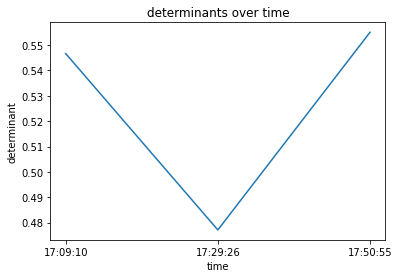

In [20]:
plt.plot(timelist,detlist)
plt.xlabel('time')
plt.ylabel('determinant')
plt.title('determinants over time')
plt.show()

In [21]:
examplematrix1=listofmatrixes[1]
examplematrix2=listofmatrixes[2]

zerozerozero0= examplematrix[0][0]
zerozerozero1=examplematrix1[0][0]
zerozerozero2= examplematrix2[0][0]
zerozerozerolist=[zerozerozero0, zerozerozero1, zerozerozero2]
zerozerozerodict = dict(zip(timelist,zerozerozerolist))

zerozeroone0= examplematrix[1][1]
zerozeroone1=examplematrix1[1][1]
zerozeroone2= examplematrix2[1][1]
zerozeroonelist=[zerozeroone0, zerozeroone1, zerozeroone2]
zerozeroonedict = dict(zip(timelist,zerozeroonelist))

zeroonezero0= examplematrix[2][2]
zeroonezero1=examplematrix1[2][2]
zeroonezero2= examplematrix2[2][2]
zeroonezerolist= [zeroonezero0, zeroonezero1, zeroonezero2]
zeroonezerodict = dict(zip(timelist,zeroonezerolist))

zerooneone0= examplematrix[3][3]
zerooneone1=examplematrix1[3][3]
zerooneone2= examplematrix2[3][3]
zerooneonelist = [zerooneone0, zerooneone1, zerooneone2]
zerooneonedict = dict(zip(timelist,zerooneonelist))

onezerozero0= examplematrix[4][4]
onezerozero1=examplematrix1[4][4]
onezerozero2= examplematrix2[4][4]
onezerozerolist = [onezerozero0, onezerozero1, onezerozero2]
onezerozerodict = dict(zip(timelist,onezerozerolist))

onezeroone0= examplematrix[5][5]
onezeroone1=examplematrix1[5][5]
onezeroone2= examplematrix2[5][5]
onezeroonelist= [onezeroone0, onezeroone1, onezeroone2]
onezeroonedict = dict(zip(timelist,onezeroonelist))

oneonezero0= examplematrix[6][6]
oneonezero1=examplematrix1[6][6]
oneonezero2= examplematrix2[6][6]
oneonezerolist = [oneonezero0, oneonezero1, oneonezero2]
oneonezerodict = dict(zip(timelist,oneonezerolist))

oneoneone0= examplematrix[7][7]
oneoneone1=examplematrix1[7][7]
oneoneone2= examplematrix2[7][7]
oneoneonelist = [oneoneone0, oneoneone1, oneoneone2]
oneoneonedict = dict(zip(timelist,oneoneonelist))

print("Percent of 000 over time", zerozerozerodict)
print("Percent of 001 over time", zerozeroonedict)
print("Percent of 010 over time", zeroonezerodict)
print("Percent of 011 over time", zerooneonedict)
print("Percent of 100 over time", onezerozerodict)
print("Percent of 101 over time", onezeroonedict)
print("Percent of 110 over time", oneonezerodict)
print("Percent of 111 over time", oneoneonedict)

Percent of 000 over time {'17:09:10': 0.9786, '17:29:26': 0.9678, '17:50:55': 0.9814}
Percent of 001 over time {'17:09:10': 0.9176, '17:29:26': 0.8658, '17:50:55': 0.9264}
Percent of 010 over time {'17:09:10': 0.9476, '17:29:26': 0.939, '17:50:55': 0.9302}
Percent of 011 over time {'17:09:10': 0.8742, '17:29:26': 0.8804, '17:50:55': 0.8882}
Percent of 100 over time {'17:09:10': 0.9754, '17:29:26': 0.9448, '17:50:55': 0.969}
Percent of 101 over time {'17:09:10': 0.9266, '17:29:26': 0.9022, '17:50:55': 0.9266}
Percent of 110 over time {'17:09:10': 0.9282, '17:29:26': 0.932, '17:50:55': 0.9272}
Percent of 111 over time {'17:09:10': 0.8796, '17:29:26': 0.8756, '17:50:55': 0.8912}


In [28]:
collectdata(matrixdata,11,[53])

2021-11-18 11:52:34.456558-06:00


ibmqfactory.load_account:WARNING:2021-11-18 17:53:00,215: Credentials are already in use. The existing account in the session will be replaced.


backend:  ibmq_casablanca
Job Status: job has successfully run
results: {'000': 4898, '001': 48, '010': 27, '011': 5, '100': 22}
[0.9796, 0.0096, 0.0054, 0.001, 0.0044, 0, 0, 0]


ibmqfactory.load_account:WARNING:2021-11-18 18:31:48,186: Credentials are already in use. The existing account in the session will be replaced.


backend:  ibmq_casablanca
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-11-18 18:32:19,262: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 228, '001': 4739, '011': 17, '100': 1, '101': 15}
[0.0456, 0.9478, 0, 0.0034, 0.0002, 0.003, 0, 0]
backend:  ibmq_casablanca
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-11-18 18:32:53,733: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 162, '001': 2, '010': 4781, '011': 32, '110': 22, '111': 1}
[0.0324, 0.0004, 0.9562, 0.0064, 0, 0, 0.0044, 0.0002]
backend:  ibmq_casablanca
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-11-18 18:33:47,417: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 14, '001': 130, '010': 232, '011': 4602, '111': 22}
[0.0028, 0.026, 0.0464, 0.9204, 0, 0, 0, 0.0044]
backend:  ibmq_casablanca
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-11-18 18:34:37,164: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 67, '010': 1, '100': 4862, '101': 39, '110': 31}
[0.0134, 0, 0.0002, 0, 0.9724, 0.0078, 0.0062, 0]
backend:  ibmq_casablanca
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-11-18 18:35:07,879: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 2, '001': 63, '100': 243, '101': 4674, '110': 2, '111': 16}
[0.0004, 0.0126, 0, 0, 0.0486, 0.9348, 0.0004, 0.0032]
backend:  ibmq_casablanca
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-11-18 18:36:48,457: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 8, '010': 77, '011': 1, '100': 571, '101': 3, '110': 4312, '111': 28}
[0.0016, 0, 0.0154, 0.0002, 0.1142, 0.0006, 0.8624, 0.0056]
backend:  ibmq_casablanca
Job Status: job has successfully run
results: {'001': 1, '010': 4, '011': 61, '100': 10, '101': 139, '110': 284, '111': 4501}
[0, 0.0002, 0.0008, 0.0122, 0.002, 0.0278, 0.0568, 0.9002]
big matrix: [[0.9796, 0.0096, 0.0054, 0.001, 0.0044, 0, 0, 0], [0.0456, 0.9478, 0, 0.0034, 0.0002, 0.003, 0, 0], [0.0324, 0.0004, 0.9562, 0.0064, 0, 0, 0.0044, 0.0002], [0.0028, 0.026, 0.0464, 0.9204, 0, 0, 0, 0.0044], [0.0134, 0, 0.0002, 0, 0.9724, 0.0078, 0.0062, 0], [0.0004, 0.0126, 0, 0, 0.0486, 0.9348, 0.0004, 0.0032], [0.0016, 0, 0.0154, 0.0002, 0.1142, 0.0006, 0.8624, 0.0056], [0, 0.0002, 0.0008, 0.0122, 0.002, 0.0278, 0.0568, 0.9002]]


{'2021-11-13 17:09:10.667507-06:00': [[0.9786,
   0.0056,
   0.012,
   0.0004,
   0.0034,
   0,
   0,
   0],
  [0.0638, 0.9176, 0.0014, 0.0132, 0.0002, 0.0036, 0, 0.0002],
  [0.0378, 0.0012, 0.9476, 0.0084, 0.0002, 0, 0.0048, 0],
  [0.0038, 0.0384, 0.077, 0.8742, 0, 0, 0.0008, 0.0058],
  [0.014, 0, 0, 0, 0.9754, 0.0064, 0.0038, 0.0004],
  [0.0012, 0.0144, 0, 0, 0.0498, 0.9266, 0.0006, 0.0074],
  [0.0012, 0, 0.014, 0, 0.0486, 0.0006, 0.9282, 0.0074],
  [0, 0.0002, 0.0006, 0.0092, 0.003, 0.0498, 0.0576, 0.8796]],
 '2021-11-13 17:29:26.314269-06:00': [[0.9678,
   0.0188,
   0.0074,
   0.0018,
   0.0042,
   0,
   0,
   0],
  [0.0654, 0.8658, 0.0098, 0.0552, 0.0002, 0.0034, 0, 0.0002],
  [0.0484, 0.0008, 0.939, 0.008, 0.0004, 0, 0.0034, 0],
  [0.0044, 0.0452, 0.0682, 0.8804, 0.0002, 0.0002, 0, 0.0014],
  [0.0128, 0, 0.0006, 0, 0.9448, 0.0156, 0.0258, 0.0004],
  [0.001, 0.0132, 0, 0, 0.0706, 0.9022, 0.0016, 0.0114],
  [0.0006, 0.0002, 0.0136, 0.0004, 0.0436, 0.0006, 0.932, 0.009],
  [0, 0.00

In [22]:
matrixdata = {'2021-11-13 17:09:10.667507-06:00': [[0.9786, 0.0056, 0.012, 0.0004, 0.0034, 0, 0, 0], [0.0638, 0.9176, 0.0014, 0.0132, 0.0002, 0.0036, 0, 0.0002], [0.0378, 0.0012, 0.9476, 0.0084, 0.0002, 0, 0.0048, 0], [0.0038, 0.0384, 0.077, 0.8742, 0, 0, 0.0008, 0.0058], [0.014, 0, 0, 0, 0.9754, 0.0064, 0.0038, 0.0004], [0.0012, 0.0144, 0, 0, 0.0498, 0.9266, 0.0006, 0.0074], [0.0012, 0, 0.014, 0, 0.0486, 0.0006, 0.9282, 0.0074], [0, 0.0002, 0.0006, 0.0092, 0.003, 0.0498, 0.0576, 0.8796]], '2021-11-13 17:29:26.314269-06:00': [[0.9678, 0.0188, 0.0074, 0.0018, 0.0042, 0, 0, 0], [0.0654, 0.8658, 0.0098, 0.0552, 0.0002, 0.0034, 0, 0.0002], [0.0484, 0.0008, 0.939, 0.008, 0.0004, 0, 0.0034, 0], [0.0044, 0.0452, 0.0682, 0.8804, 0.0002, 0.0002, 0, 0.0014], [0.0128, 0, 0.0006, 0, 0.9448, 0.0156, 0.0258, 0.0004], [0.001, 0.0132, 0, 0, 0.0706, 0.9022, 0.0016, 0.0114], [0.0006, 0.0002, 0.0136, 0.0004, 0.0436, 0.0006, 0.932, 0.009], [0, 0.0002, 0.0006, 0.0112, 0.0034, 0.0416, 0.0674, 0.8756]], '2021-11-13 17:50:55.626124-06:00': [[0.9814, 0.0064, 0.006, 0.0002, 0.0058, 0.0002, 0, 0], [0.0612, 0.9264, 0.0002, 0.0062, 0.0002, 0.0058, 0, 0], [0.0556, 0.0004, 0.9302, 0.0088, 0.0004, 0, 0.0044, 0.0002], [0.0036, 0.0474, 0.0566, 0.8882, 0, 0, 0.0004, 0.0038], [0.014, 0.0002, 0, 0, 0.969, 0.0116, 0.0052, 0], [0.0008, 0.0112, 0, 0, 0.0536, 0.9266, 0.0008, 0.007], [0.0008, 0, 0.0128, 0, 0.0486, 0.0002, 0.9272, 0.0104], [0, 0.0008, 0.0006, 0.0116, 0.0034, 0.0366, 0.0558, 0.8912]], '2021-11-18 12:37:18.182071-06:00': [[0.9796, 0.0096, 0.0054, 0.001, 0.0044, 0, 0, 0], [0.0456, 0.9478, 0, 0.0034, 0.0002, 0.003, 0, 0], [0.0324, 0.0004, 0.9562, 0.0064, 0, 0, 0.0044, 0.0002], [0.0028, 0.026, 0.0464, 0.9204, 0, 0, 0, 0.0044], [0.0134, 0, 0.0002, 0, 0.9724, 0.0078, 0.0062, 0], [0.0004, 0.0126, 0, 0, 0.0486, 0.9348, 0.0004, 0.0032], [0.0016, 0, 0.0154, 0.0002, 0.1142, 0.0006, 0.8624, 0.0056], [0, 0.0002, 0.0008, 0.0122, 0.002, 0.0278, 0.0568, 0.9002]]}
print(matrixdata)

{'2021-11-13 17:09:10.667507-06:00': [[0.9786, 0.0056, 0.012, 0.0004, 0.0034, 0, 0, 0], [0.0638, 0.9176, 0.0014, 0.0132, 0.0002, 0.0036, 0, 0.0002], [0.0378, 0.0012, 0.9476, 0.0084, 0.0002, 0, 0.0048, 0], [0.0038, 0.0384, 0.077, 0.8742, 0, 0, 0.0008, 0.0058], [0.014, 0, 0, 0, 0.9754, 0.0064, 0.0038, 0.0004], [0.0012, 0.0144, 0, 0, 0.0498, 0.9266, 0.0006, 0.0074], [0.0012, 0, 0.014, 0, 0.0486, 0.0006, 0.9282, 0.0074], [0, 0.0002, 0.0006, 0.0092, 0.003, 0.0498, 0.0576, 0.8796]], '2021-11-13 17:29:26.314269-06:00': [[0.9678, 0.0188, 0.0074, 0.0018, 0.0042, 0, 0, 0], [0.0654, 0.8658, 0.0098, 0.0552, 0.0002, 0.0034, 0, 0.0002], [0.0484, 0.0008, 0.939, 0.008, 0.0004, 0, 0.0034, 0], [0.0044, 0.0452, 0.0682, 0.8804, 0.0002, 0.0002, 0, 0.0014], [0.0128, 0, 0.0006, 0, 0.9448, 0.0156, 0.0258, 0.0004], [0.001, 0.0132, 0, 0, 0.0706, 0.9022, 0.0016, 0.0114], [0.0006, 0.0002, 0.0136, 0.0004, 0.0436, 0.0006, 0.932, 0.009], [0, 0.0002, 0.0006, 0.0112, 0.0034, 0.0416, 0.0674, 0.8756]], '2021-11-13 17:50